importation des librairies

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;

lecture du dataset

In [46]:
file_path = '../data/lacentrale-dev.csv'
lacentral_df = pd.read_csv(file_path)
lacentral_df.shape

(8016, 9)

In [47]:
lacentral_df.head()

,price,model,energy,gear_box,kilometers,year,zip_code,cylinder,horsepower
0,158 590 €,PORSCHE 911 TYPE 997 CABRIOLET phase 2,Essence,Automatique,68 076 km,2013,61 ‌,3.8,530.0
1,16 030 €,MINI MINI III 5P,Essence,Manuelle,119 081 km,2016,76 ‌,1.5,102.0
2,127 490 €,PORSCHE 911 TYPE 993,Essence,Manuelle,184 800 km,1999,45 ‌,3.6,285.0
3,26 400 €,RENAULT KADJAR,Diesel,Manuelle,42 607 km,2021,77 ‌,1.5,115.0
4,10 640 €,RENAULT CLIO IV,Essence,Manuelle,143 050 km,2016,92 ‌,1.2,75.0


In [48]:
lacentral_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8016 entries, 0 to 8015
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       8016 non-null   object 
 1   model       8016 non-null   object 
 2   energy      7983 non-null   object 
 3   gear_box    8016 non-null   object 
 4   kilometers  8016 non-null   object 
 5   year        8016 non-null   int64  
 6   zip_code    8016 non-null   object 
 7   cylinder    7999 non-null   float64
 8   horsepower  7999 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 563.8+ KB


In [49]:
lacentral_df.columns

Index(['price', 'model', 'energy', 'gear_box', 'kilometers', 'year',
       'zip_code', 'cylinder', 'horsepower'],
      dtype='object')

In [50]:
lacentral_df.describe()

,year,cylinder,horsepower
count,8016.000000,7999.000000,7999.000000
mean,2018.966816,6.679385,158.920090
std,4.693410,34.735221,111.921142
min,1958.000000,0.500000,0.500000
25%,2018.000000,1.200000,102.000000
50%,2020.000000,1.500000,130.000000
75%,2022.000000,2.000000,180.000000
max,2024.000000,1200.000000,3243.000000


In [51]:
if lacentral_df.isnull().any().any():
    print("There are null values in the DataFrame")
else:
    print("There are no null values in the DataFrame")

There are null values in the DataFrame


In [52]:
lacentral_df = lacentral_df.dropna()
lacentral_df.shape

(7966, 9)

In [53]:
num_duplicates = lacentral_df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 1931


In [54]:
duplicated_rows = lacentral_df[lacentral_df.duplicated()]
lacentral_df.drop_duplicates(inplace=True)
lacentral_df.shape

(6035, 9)

1266 modèles de voiture

In [14]:
lacentral_df['model'].value_counts().reset_index()

,model,count
0,PEUGEOT 208 II,140
1,CITROEN C3 III phase 2,109
2,PEUGEOT 3008 II,107
3,PEUGEOT 2008 II,104
4,CITROEN C3 III,99
...,...,...
1262,HYUNDAI I30 II,1
1263,JAGUAR XKR II phase 2,1
1264,MERCEDES CL III AMG,1
1265,VOLVO V50 phase 2,1


62 marques

In [15]:
lacentral_df['brand'] = lacentral_df['model'].str.strip().str.split().str[0]
lacentral_df['brand'].value_counts().reset_index()

,brand,count
0,PEUGEOT,1288
1,RENAULT,933
2,CITROEN,784
3,VOLKSWAGEN,591
4,MERCEDES,577
...,...,...
57,HUMMER,1
58,MERCEDES-AMG,1
59,AIXAM,1
60,SAAB,1


Visualister les 20 modeles de voitures les plus vendus

In [75]:
car_model = lacentral_df.model.value_counts().reset_index().head(20)
car_model

,model,count
0,PEUGEOT 208 II,140
1,CITROEN C3 III phase 2,109
2,PEUGEOT 3008 II,107
3,PEUGEOT 2008 II,104
4,CITROEN C3 III,99
5,RENAULT CLIO V,93
6,MERCEDES CLASSE A IV,85
7,PEUGEOT 2008 phase 2,78
8,PEUGEOT 3008 II phase 2,75
9,PEUGEOT 308 II phase 2,74


Text(0, 0.5, 'Model name')

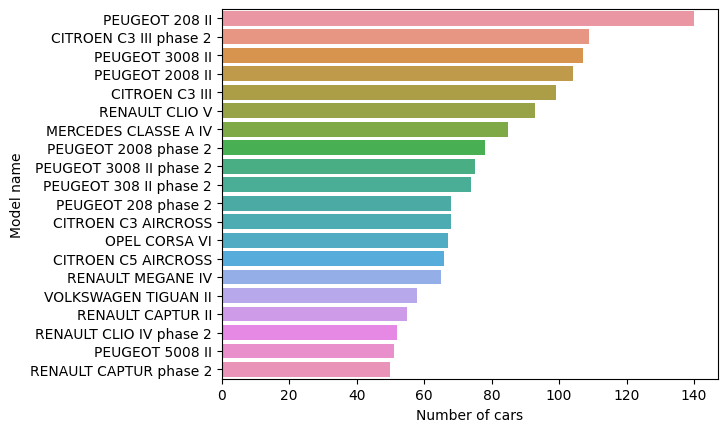

In [76]:
sns.barplot(y='model', x='count', data=car_model)
plt.xlabel('Number of cars')
plt.ylabel('Model name')

On a beaucoup de model mais les nombres devoiture par modeles sont peu élevé
on va donc regarder les 20 marques les plus vendus

In [77]:
marques = car_model.model.str.strip().str.split().str[0].value_counts().reset_index().head(20)
marques

,model,count
0,PEUGEOT,8
1,RENAULT,5
2,CITROEN,4
3,MERCEDES,1
4,OPEL,1
5,VOLKSWAGEN,1


Text(0, 0.5, 'Model name')

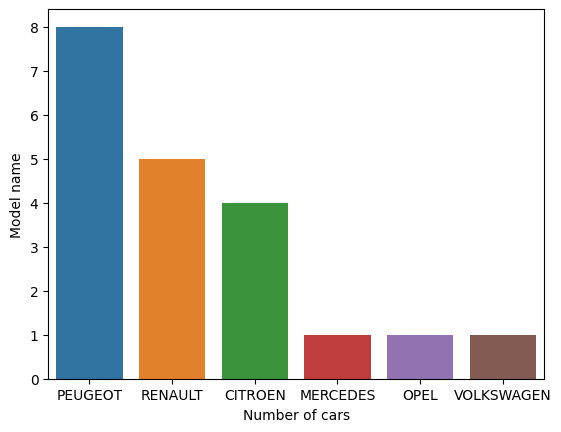

In [78]:
sns.barplot(y='count', x='model', data=marques)
plt.xlabel('Number of cars')
plt.ylabel('Model name')

La c'est plus parlant et on peut dire que les français aiment bien les peugeots.

Maintenant regardant du coté des prix.

In [79]:
lacentral_df.price = lacentral_df.price.str.strip().str.extract(r'([0-9 ]+)')[0].str.replace(' ', '').astype('int')
lacentral_df.price = lacentral_df[lacentral_df.price < 200000]['price']

Text(0, 0.5, 'Frequency')

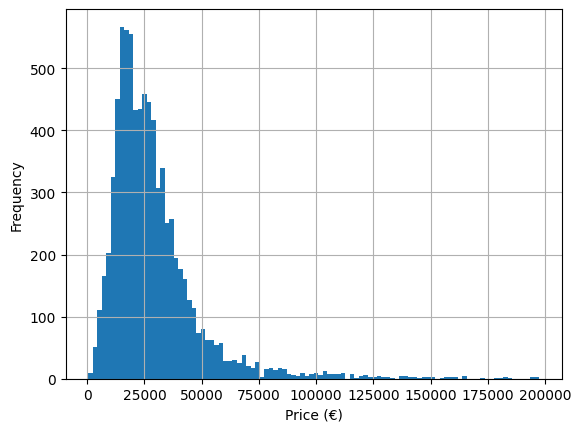

In [80]:
car_price = lacentral_df.price
car_price.hist(bins=100)
plt.xlabel('Price (€)')
plt.ylabel('Frequency')

Regardons la puissance

<Axes: xlabel='horsepower', ylabel='Count'>

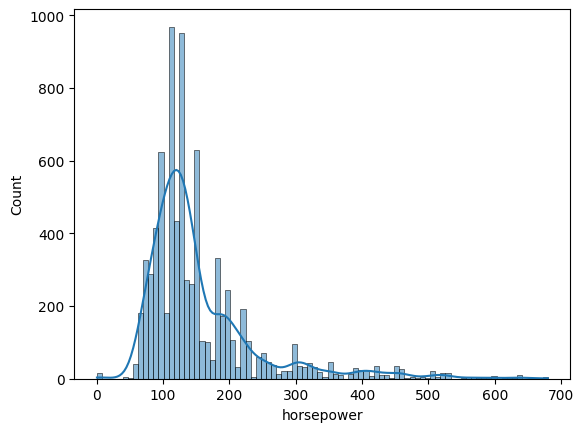

In [81]:
lacentral_df.horsepower = lacentral_df[lacentral_df.horsepower < 700]['horsepower']
sns.histplot(data=lacentral_df, x="horsepower", kde=True)

On peut maintenant regarder par rapport à la date de la mise en circulation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '2005'),
  Text(1, 0, '2006'),
  Text(2, 0, '2007'),
  Text(3, 0, '2008'),
  Text(4, 0, '2009'),
  Text(5, 0, '2010'),
  Text(6, 0, '2011'),
  Text(7, 0, '2012'),
  Text(8, 0, '2013'),
  Text(9, 0, '2014'),
  Text(10, 0, '2015'),
  Text(11, 0, '2016'),
  Text(12, 0, '2017'),
  Text(13, 0, '2018'),
  Text(14, 0, '2019'),
  Text(15, 0, '2020'),
  Text(16, 0, '2021'),
  Text(17, 0, '2022'),
  Text(18, 0, '2023'),
  Text(19, 0, '2024')])

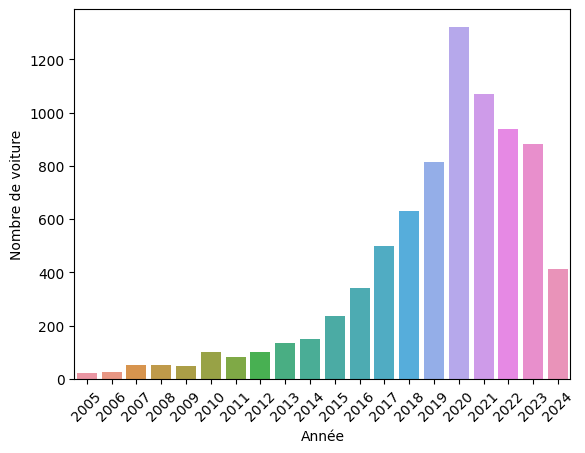

In [82]:
sns.barplot(x='year', y='count', data=lacentral_df['year'].value_counts().reset_index().head(20))
plt.xlabel('Année')
plt.ylabel('Nombre de voiture')
plt.xticks(rotation=45)

In [85]:
lacentral_df.kilometers = lacentral_df.kilometers.str.strip().str.extract(r'([0-9 ]+)')[0].str.replace(' ', '').astype('int')

In [13]:
kilometers = lacentral_df[lacentral_df.kilometers < 350000]['kilometers']

TypeError: '<' not supported between instances of 'str' and 'int'

<Axes: xlabel='kilometers', ylabel='Count'>

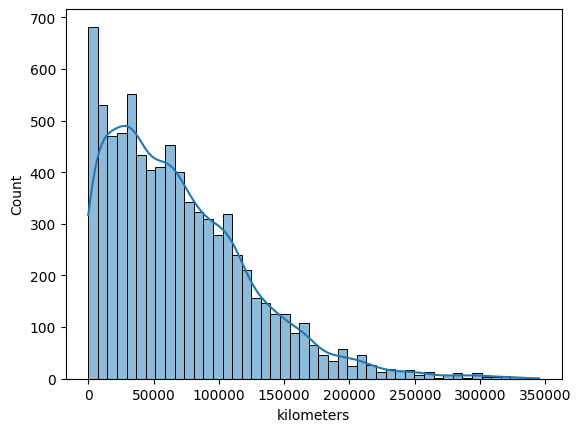

In [99]:
sns.histplot(data=kilometers, kde=True)

Text(0, 0.5, 'Frequency')

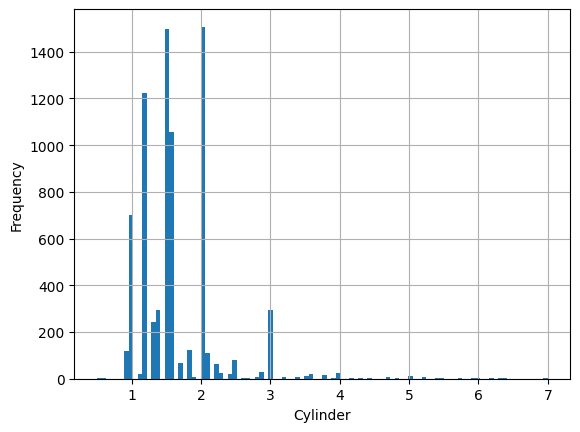

In [17]:
lacentral_df['cylinder'] = lacentral_df[lacentral_df['cylinder'] < 8]['cylinder']
car_cylinder = lacentral_df.cylinder
car_cylinder.hist(bins=100)
plt.xlabel('Cylinder')
plt.ylabel('Frequency')

On peut regarder aussi le type du carburant

In [100]:
energies = lacentral_df['energy'].value_counts().reset_index()
energies

,energy,count
0,Essence,3520
1,Diesel,3395
2,Hybrides,727
3,Électrique,304
4,Bicarburation essence / gpl,24
5,Bicarburation essence bioéthanol,13


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Essence'),
  Text(1, 0, 'Diesel'),
  Text(2, 0, 'Hybrides'),
  Text(3, 0, 'Électrique'),
  Text(4, 0, 'Bicarburation essence / gpl'),
  Text(5, 0, 'Bicarburation essence bioéthanol')])

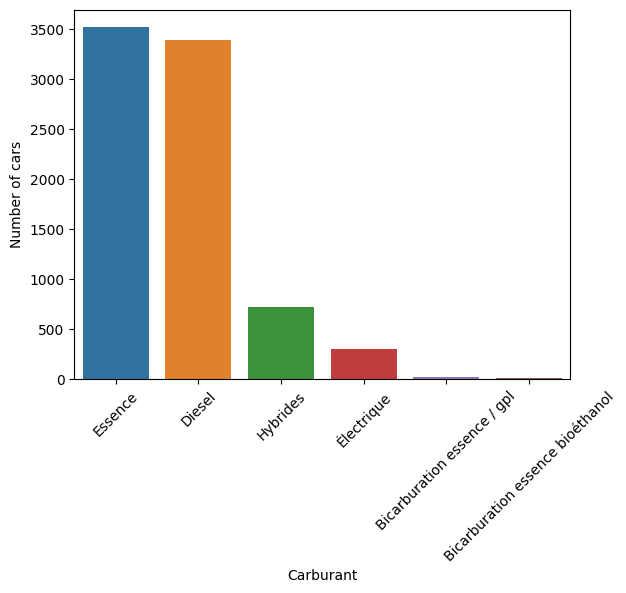

In [105]:
sns.barplot(x='energy', y='count', data=energies)
plt.ylabel('Number of cars')
plt.xlabel('Carburant')
plt.xticks(rotation=45)

In [115]:
lacentral_df.dtypes

# corr = lacentral_df.corr()
# import numpy as np
# mask = np.triu(np.ones_like(corr, dtype=bool))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(corr, annot=True, linewidths=0.01, mask=mask, cmap=cmap)
# lacentral_df.drop('model', axis=1, inplace=True)

price         float64
model          object
energy         object
gear_box       object
kilometers      int64
year            int64
zip_code       object
cylinder      float64
horsepower    float64
dtype: object

In [117]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
price = encoder.fit_transform(lacentral_df.price)
model = encoder.fit_transform(lacentral_df.model)
energy = encoder.fit_transform(lacentral_df.energy)
gear_box = encoder.fit_transform(lacentral_df.gear_box)
year = encoder.fit_transform(lacentral_df.year)
zip_code = encoder.fit_transform(lacentral_df.zip_code)
cylinder = encoder.fit_transform(lacentral_df.cylinder)
horsepower = encoder.fit_transform(lacentral_df.horsepower)
df = lacentral_df
df[['price']] = price 
df[['model']] = model
df[['energy']] = energy
df[['gear_box']] = gear_box
df[['year']] = year
df[['zip_code']] = zip_code
df[['cylinder']] = cylinder
df[['horsepower']] = horsepower

# X[['model']] = model_column 
# X[['boite']] = boite_column
# X[['energie']] = energie_column
# X[['premiere_main']] = premiere_main_column

ValueError: Expected 2D array, got 1D array instead:
array=[158590.  16030. 127490. ...  34030.  18790.  44730.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

On s'aperçoit que la puissance et l'année de mise en circulation sont des facteurs importants dans la vente de la voiture